In [1]:
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix

import sys 

import sklearn
import numpy as np 
import os
import pandas as pd
import time

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.utils import io

In [2]:
df = pd.read_csv('csgo_round_snapshots.csv')

In [3]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [5]:
df.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,...,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,...,1.772791,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


In [6]:
df.isnull().sum().sum()

0

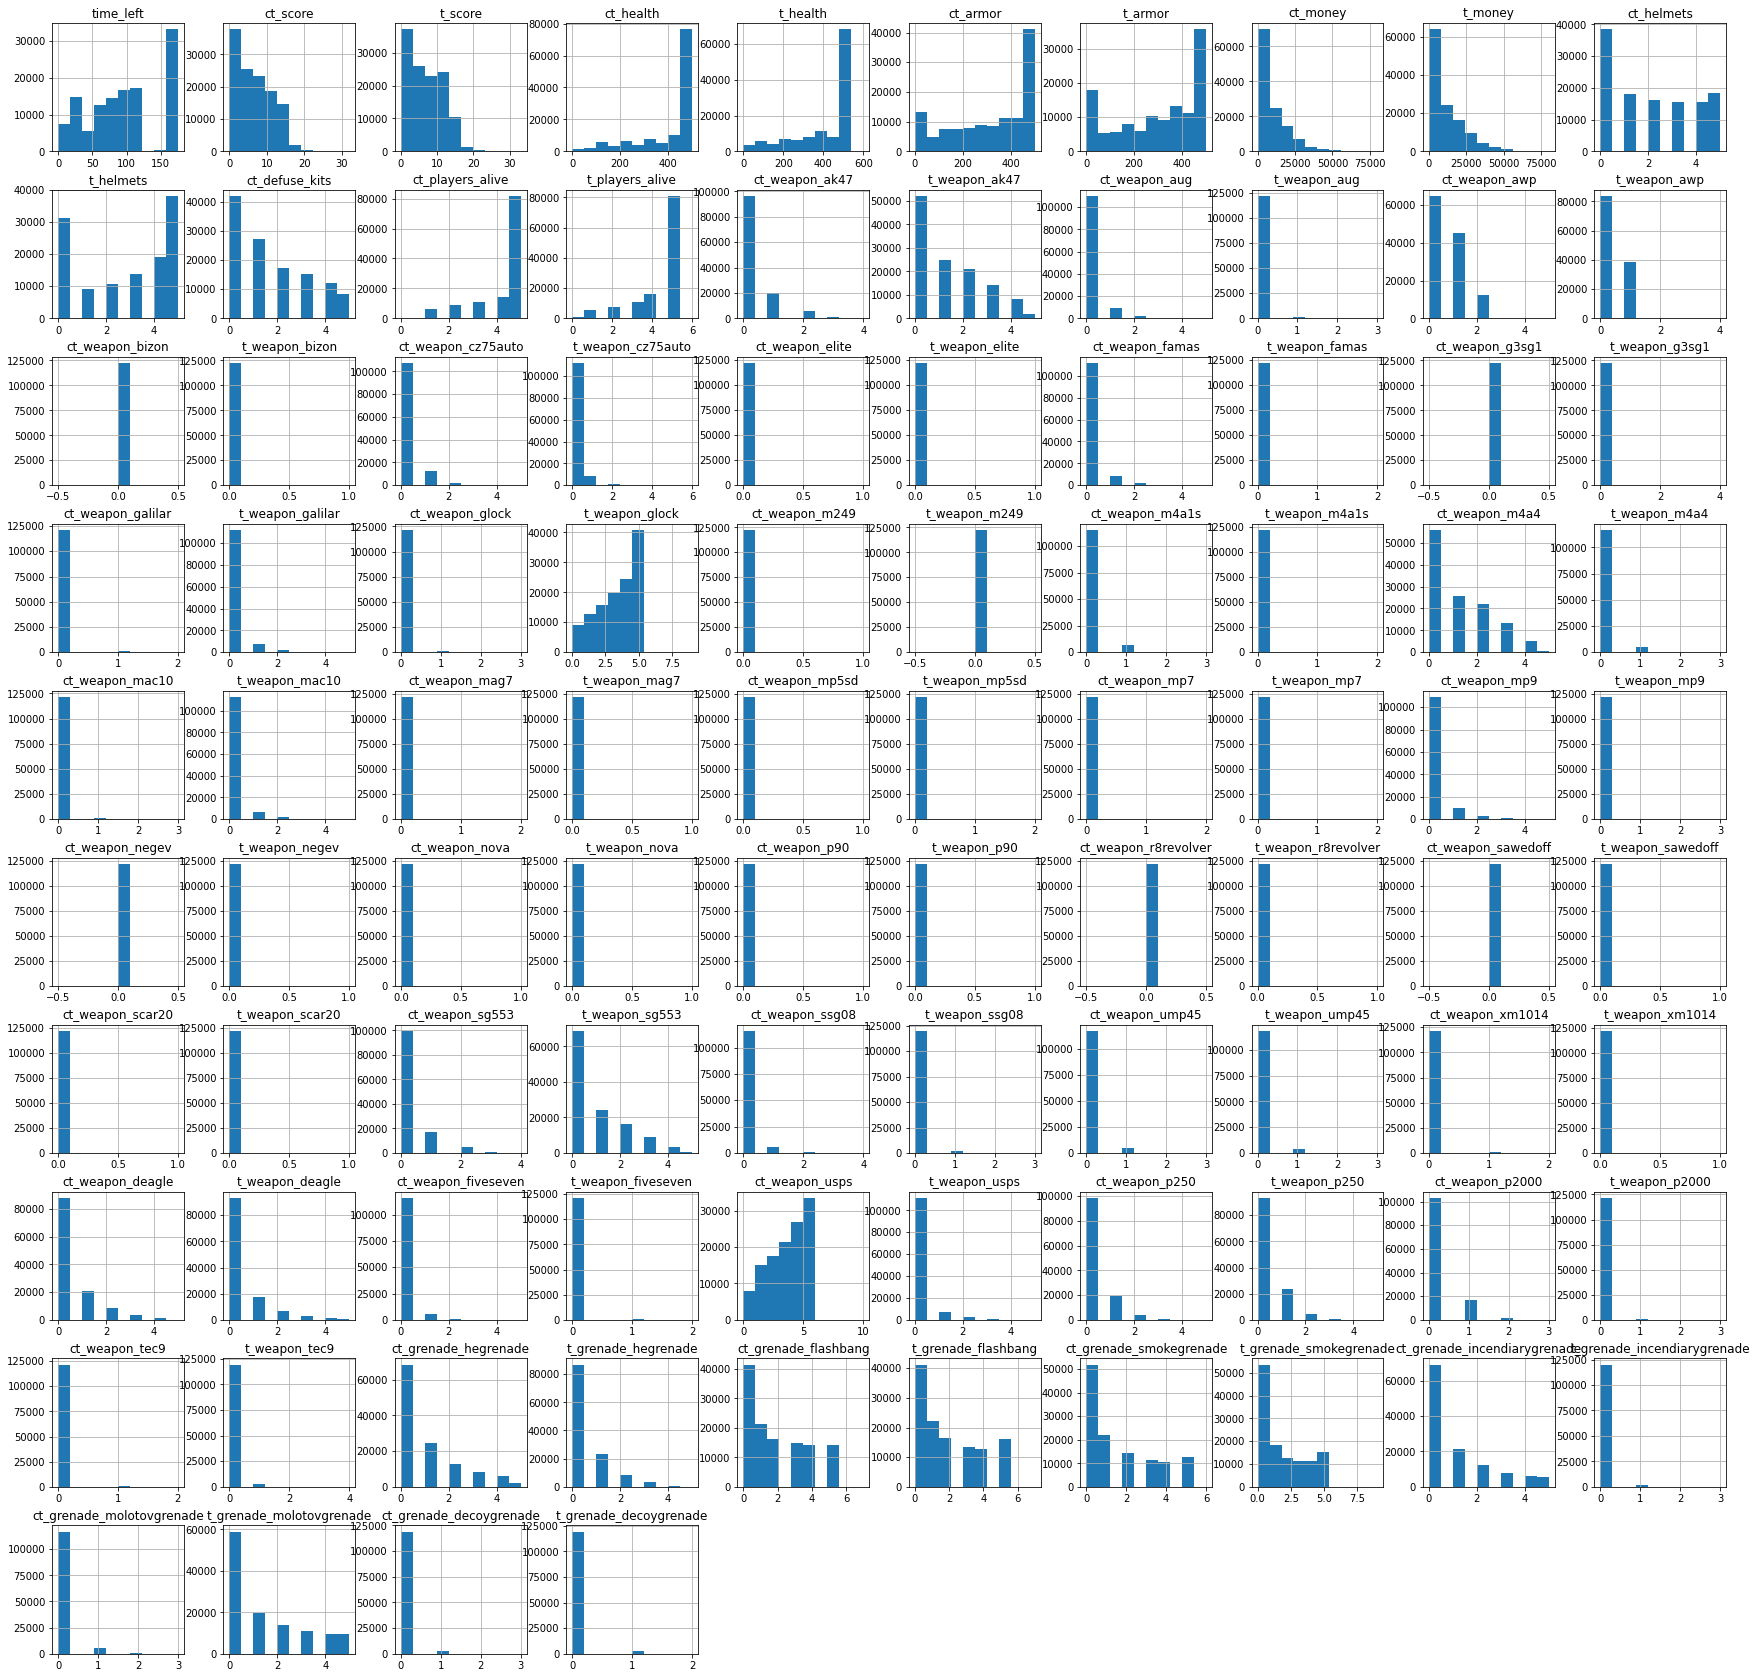

In [7]:
df.hist(figsize=(30,30));

In [8]:
df['round_winner'] = df['round_winner'].apply(lambda x: 1 if x == 'T' else 0)
df['round_winner'] = df['round_winner'].astype(str).astype(int)

## With outliers

In [9]:
ddf = pd.get_dummies(df)

label = ddf['round_winner']
data = ddf.drop('round_winner',axis=1)

X_train,X_test,y_train,y_test = train_test_split(data,label,test_size=0.2,random_state=0)

In [10]:
from sklearn.dummy import DummyClassifier

doc_clf = DummyClassifier(strategy="most_frequent")

doc_clf.fit(X_train,y_train)
score = doc_clf.score(X_test,y_test)
print("dummy classifier:{}".format(score))

dummy classifier:0.5120905154807613


In [11]:
from sklearn.neighbors import KNeighborsClassifier

knno_clf = KNeighborsClassifier(n_neighbors=10)

knno_clf.fit(X_train,y_train)
score = knno_clf.score(X_test,y_test)
print("knn classifier:{}".format(score))

knn classifier:0.7415652315987256


In [12]:
from sklearn.linear_model import LinearRegression

lro_clf =  LinearRegression()

lro_clf.fit(X_train,y_train)
score = lro_clf.score(X_test,y_test)
print("lr:{}".format(score))

lr:0.3433519981414348


In [13]:
from sklearn.ensemble import RandomForestClassifier

rfo_clf = RandomForestClassifier(n_estimators=1000,n_jobs=-1)

rfo_clf.fit(X_train,y_train)
score = rfo_clf.score(X_test,y_test)
print("random forest :{}".format(score))

random forest :0.8831794788007515


## removing outliers

In [14]:
fetures = df.columns

In [15]:
for f in fetures:
    if "weapon" in f or "grenade" in f:
        for i in range(1,11):
            if df.loc[df[f] > i ][f].sum() < 10000:
                df = df.drop(df.loc[df[f] > i ].index)
                break

for f in fetures:
    if "weapon" in f or "grenade" in f:
        if df.loc[df[f] > 0 ][f].sum() < 10000:
            df = df.drop(f,axis = 1)
            continue

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81578 entries, 0 to 122409
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   time_left                     81578 non-null  float64
 1   ct_score                      81578 non-null  float64
 2   t_score                       81578 non-null  float64
 3   map                           81578 non-null  object 
 4   bomb_planted                  81578 non-null  bool   
 5   ct_health                     81578 non-null  float64
 6   t_health                      81578 non-null  float64
 7   ct_armor                      81578 non-null  float64
 8   t_armor                       81578 non-null  float64
 9   ct_money                      81578 non-null  float64
 10  t_money                       81578 non-null  float64
 11  ct_helmets                    81578 non-null  float64
 12  t_helmets                     81578 non-null  float64
 13  

[]

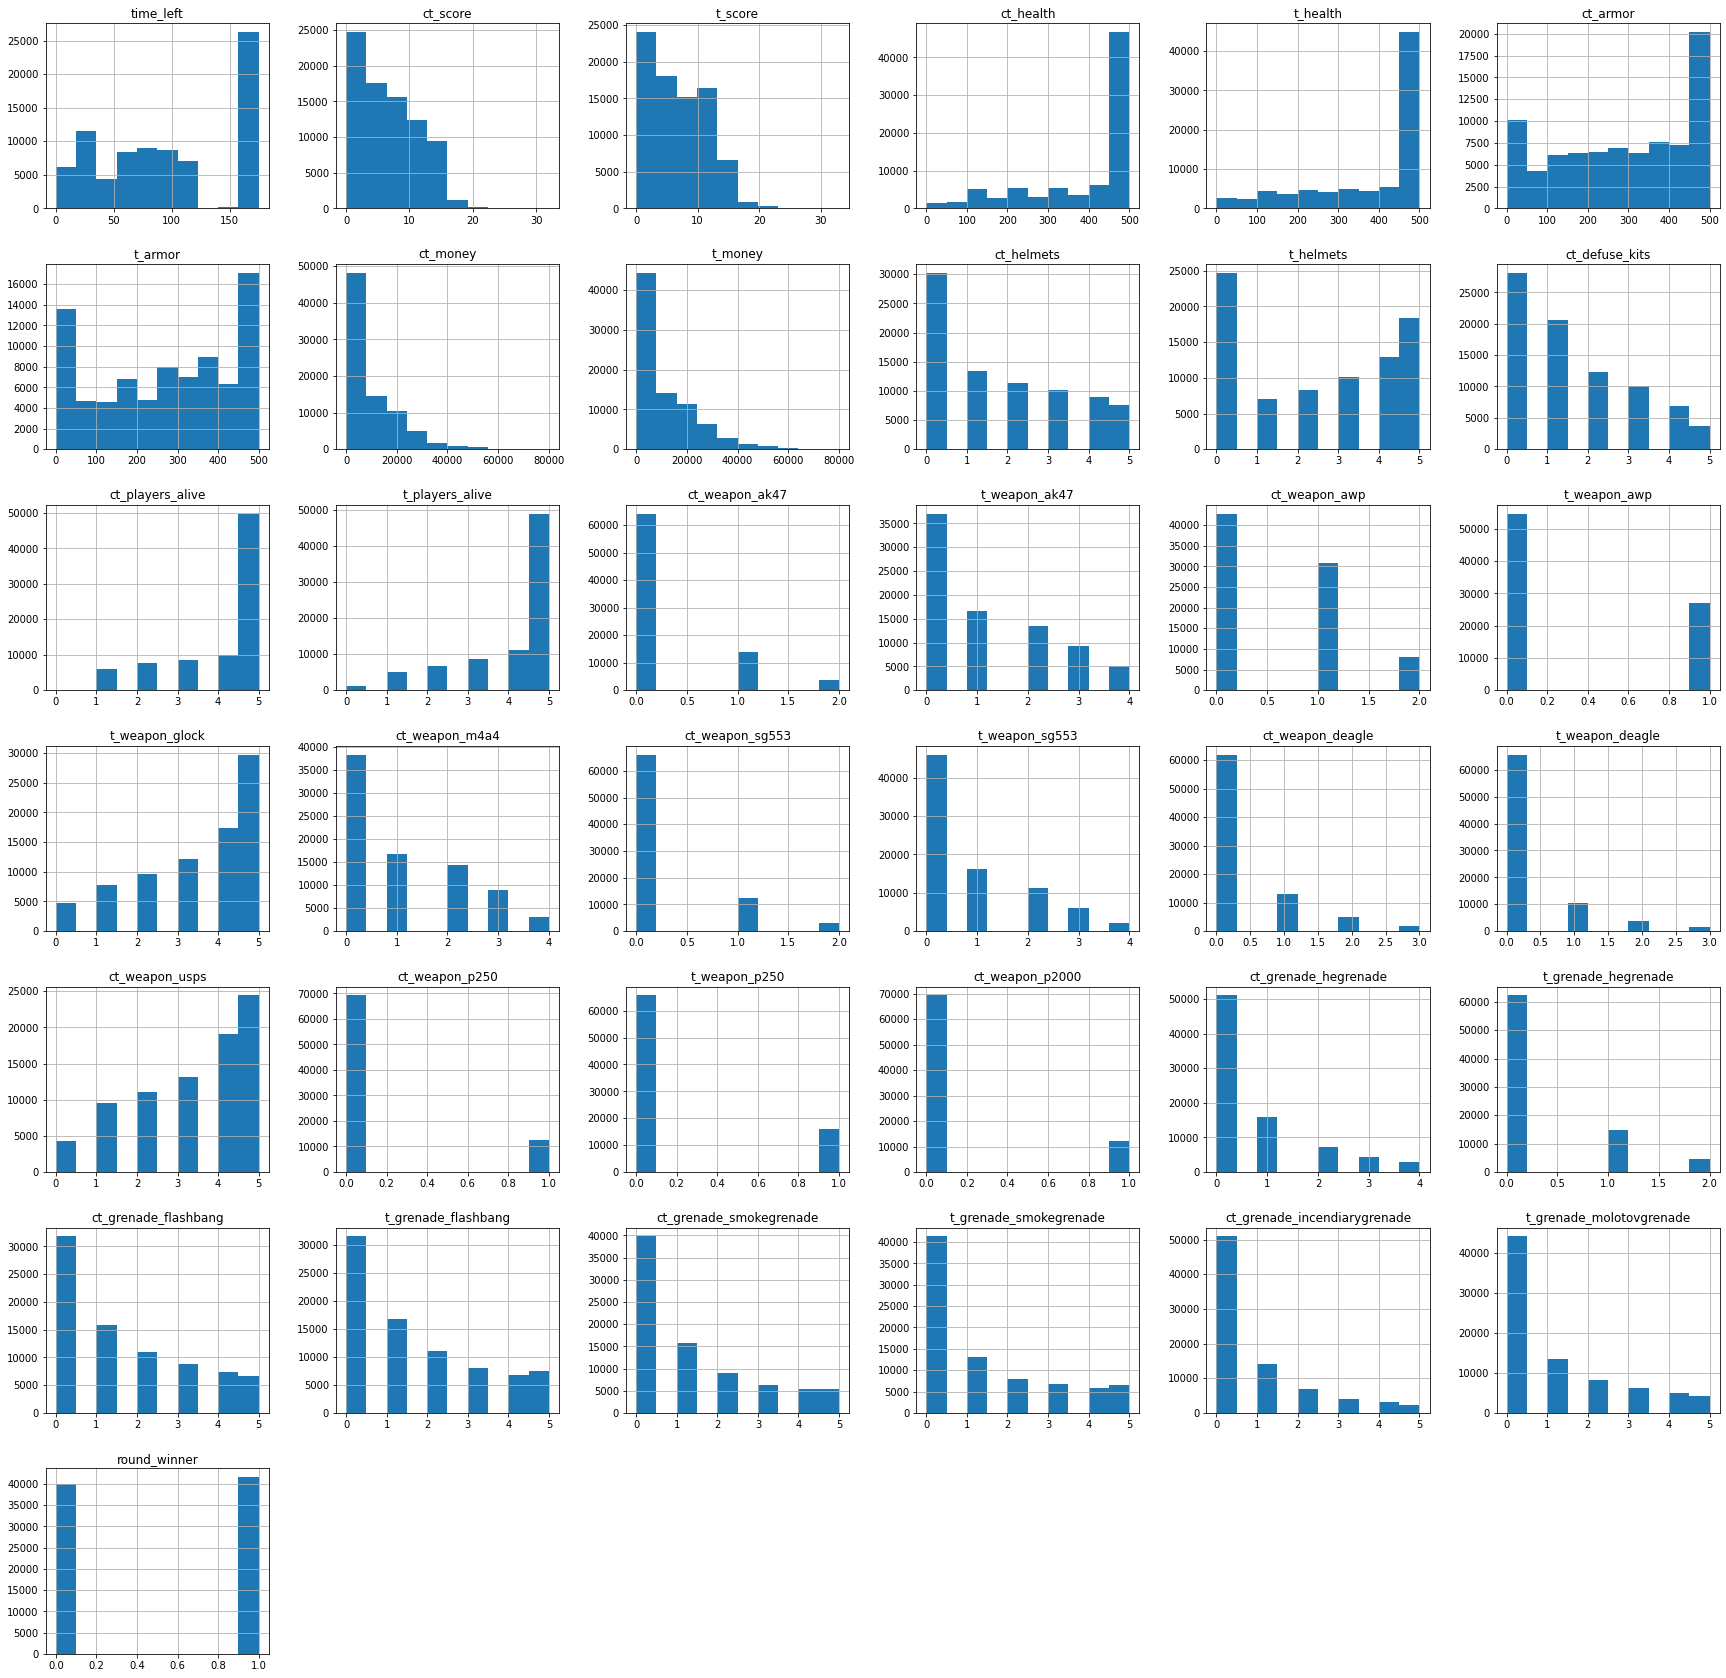

In [17]:
df.hist(figsize=(30,30))
plt.plot()

In [24]:
ddf = pd.get_dummies(df)

label = ddf['round_winner']
data = ddf.drop('round_winner',axis=1)

X_train,X_test,y_train,y_test = train_test_split(data,label,test_size=0.2,random_state=0)

std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [25]:
from sklearn.dummy import DummyClassifier

dc_clf = DummyClassifier(strategy="most_frequent")

dc_clf.fit(X_train,y_train)
score = dc_clf.score(X_test,y_test)
print("dummy classifier:{}".format(score))

dummy classifier:0.5072321647462613


In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=10)

knn_clf.fit(X_train,y_train)
knn_clf.score(X_test,y_test)

0.8067541063986271

In [27]:
from sklearn.linear_model import LinearRegression

lr_clf =  LinearRegression()

lr_clf.fit(X_train,y_train)
score = lr_clf.score(X_test,y_test)
print("Linear Regression :{}".format(score))

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=1000,n_jobs=-1)

rf_clf.fit(X_train,y_train)
score = rf_clf.score(X_test,y_test)
print("random forest :{}".format(score))

random forest :0.8839176268693307


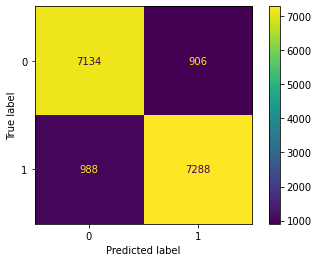

In [29]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf_clf,X_test,y_test)

## conclusion